In [1]:
!pip install pyLDAvis
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import gensim
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


RuntimeError: ignored

ImportError: ignored

In [ ]:
data = pd.read_csv("/content/QueryResults_Clear.csv",
                   converters={"title": literal_eval,
                               "body": literal_eval,
                               "tags": literal_eval})
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,body,tags
0,"[memory, gpus, model]","[gpus, gpu, image, memory, error, memory, imag...",[python]
1,[ubuntu],"[xampp, server, command, xampp, command, result]",[php]
2,"[prop, value, input, redux, react]","[input, field, form, button, field, redux, dif...",[react-native]
3,"[cs, j, web, application, servlet]","[project, structure, intellij, idea, java, web...","[javascript, java, css]"
4,"[factor, analysis, array, dataframe]","[factor, analysis, lib, result, array, number,...",[python]


In [ ]:
Xall = data['body'] + data['title']

Y = data['tags']
# Binarise multilabel
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(Y)
Y_multi = multilabel_binarizer.transform(Y)

Xall

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [gpus, gpu, image, memory, error, memory, imag...
1        [xampp, server, command, xampp, command, resul...
2        [input, field, form, button, field, redux, dif...
3        [project, structure, intellij, idea, java, web...
4        [factor, analysis, lib, result, array, number,...
                               ...                        
38014    [device, proxy, select, wifi, option, proxy, p...
38015    [text, array, yearmonthdate, javascripti, text...
38016    [chess, game, vector, vector, chess, piece, cl...
38017    [payment, gateway, django, zeep, module, payme...
38018    [spring, mvc, project, inteij, idea, english, ...
Length: 38019, dtype: object

In [ ]:
#Init TFIDF vector
vectorizer = TfidfVectorizer(analyzer="word",
                             max_df=.6,
                             min_df=0.005,
                             tokenizer=None,
                             preprocessor=' '.join,
                             stop_words=None,
                             lowercase=False)
vectorizer.fit(Xall)
X_tfidf = vectorizer.transform(Xall)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<38019x476 sparse matrix of type '<class 'numpy.float64'>'
	with 419286 stored elements in Compressed Sparse Row format>

In [ ]:
# Bag of words
bagOfWords = corpora.Dictionary(Xall)
bagOfWords.filter_extremes(no_below=4, no_above=0.6, keep_n=None)

# Term Document Frequency 
corpus = [bagOfWords.doc2bow(text) for text in Xall]  
# View 
print(Xall[:1])
[[(bagOfWords[id], freq) for id, freq in cp] for cp in corpus[:1]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [gpus, gpu, image, memory, error, memory, imag...
dtype: object


[[('error', 1),
  ('gpu', 1),
  ('gpus', 3),
  ('image', 3),
  ('input', 1),
  ('memory', 4),
  ('model', 1),
  ('thing', 1),
  ('way', 1)]]

In [ ]:
metricsEval = pd.DataFrame(columns=["nom","Accuracy","Jaccard","Precision"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# calcul de metrics
def calculMetric(model,y,y_pred):
    locData = [model]
    acc = metrics.accuracy_score(y,y_pred)
    locData.append(acc)
    jac = metrics.jaccard_score(y,y_pred,average='weighted')
    locData.append(jac)
    prec = metrics.precision_score(y,y_pred,average='weighted')
    locData.append(prec)
    
    metricsEval.loc[len(metricsEval)]=locData

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA

In [ ]:
lda_model = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=bagOfWords,
                                  num_topics=20,
                                  random_state=8,
                                  per_word_topics=True,
                                  workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate Document/topic matrix with Gensim
doc_topic = pd.DataFrame(lda_model.get_document_topics(corpus,
                                                  minimum_probability=0))
for topic in doc_topic.columns:
    doc_topic[topic] = doc_topic[topic].apply(lambda x : x[1])

In [ ]:
# Matricial multiplication with Document / Topics transpose
topic_tag = np.matmul(doc_topic.T, Y_multi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_results = pd.DataFrame(Y)
y_results["best_topic"] = doc_topic.idxmax(axis=1).values
y_results["nb_tags"] = y_results["tags"].apply(lambda x : len(x))

df_y_bin = pd.DataFrame(Y_multi)
df_dict = dict(
    list(
        df_y_bin.groupby(df_y_bin.index)
    )
)

tags_num = []
for k, v in df_dict.items():
    check = v.columns[(v == 1).any()]
    tags_num.append(check.to_list())

y_results["y_true"] = tags_num

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Select predicted tags in Topics / Tags matrix
list_tag = []
for row in y_results.itertuples():
    nb_tags = row.nb_tags
    best_topic = row.best_topic
    row_tags = list(topic_tag.iloc[best_topic]\
                    .sort_values(ascending=False)[0:nb_tags].index)
    list_tag.append(row_tags)
    
y_results["y_pred"] = list_tag

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create matrix for pred and true y LDA
lda_y_pred = np.zeros(Y_multi.shape)
n = 0
for row in y_results.y_pred.values:
    for i in range(len(row)):
        lda_y_pred[n,row[i]] = 1
    n+=1
    
lda_y_true = np.zeros(Y_multi.shape)
m = 0
for row in y_results.y_true.values:
    for i in range(len(row)):
        lda_y_true[m,row[i]] = 1
    m+=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(y_results[0:5])

                      tags  best_topic  nb_tags       y_true        y_pred
0                 [python]          15        1         [26]          [34]
1                    [php]          15        1         [24]          [34]
2           [react-native]          10        1         [29]          [26]
3  [javascript, java, css]          12        3  [7, 16, 17]  [26, 17, 16]
4                 [python]          13        1         [26]          [26]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
calculMetric("LDA",lda_y_true,lda_y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.092254  0.083270       1        1  10.806332
1     -0.114923 -0.011007       2        1   7.177585
2      0.027922  0.013687       3        1   6.377592
0      0.052106  0.003153       4        1   5.721264
14    -0.086581 -0.008501       5        1   5.684593
10     0.036656  0.014466       6        1   5.440645
15    -0.054322  0.052702       7        1   5.367657
9      0.092200 -0.092880       8        1   5.361690
12    -0.064342 -0.004377       9        1   5.353919
6     -0.035420 -0.028612      10        1   4.805311
4      0.040365 -0.016112      11        1   4.748701
17    -0.002023 -0.054696      12        1   4.324692
18    -0.003762 -0.065513      13        1   4.321816
11     0.007763 -0.036505      14        1   4.318025
3     -0.050709  0.070972      15        1   3.890163
16     0.007049  0.059532      16        1   3.679546
19    -0.010677 -0.006256      17        1   3.563084
7      0.026587  0.027216      18        1   3.236449
8     -0.007491 -0.043086      19        1   3.076278
5      0.047349  0.042546      20        1   2.744656, topic_info=         Term          Freq         Total Category  logprob  loglift
31       file  16469.000000  16469.000000  Default  30.0000  30.0000
140      data  14496.000000  14496.000000  Default  29.0000  29.0000
161  function  11596.000000  11596.000000  Default  28.0000  28.0000
91     column   8062.000000   8062.000000  Default  27.0000  27.0000
126   element   4632.000000   4632.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
182   example    169.726984   6331.068511  Topic20  -4.9990  -0.0235
8         way    177.708211   9293.005022  Topic20  -4.9531  -0.3614
130    string    156.470155   5118.553330  Topic20  -5.0804   0.1078
3       image    161.814429   6259.718502  Topic20  -5.0468  -0.0599
101     class    154.549571   7397.983449  Topic20  -5.0927  -0.2729

[1704 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3880      5  0.136521  aac
3880     15  0.682607  aac
5343     17  0.878772  aad
177       1  0.092612  abc
177       3  0.023153  abc
...     ...       ...  ...
1414     14  0.012042  zip
1414     17  0.020070  zip
1414     18  0.004014  zip
1414     19  0.012042  zip
1414     20  0.020070  zip

[9504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 2, 3, 1, 15, 11, 16, 10, 13, 7, 5, 18, 19, 12, 4, 17, 20, 8, 9, 6])

Regression multi Logistique

In [ ]:
pip install "pandas<2.0.0"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
# Create train and test split (80%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y_multi,
                                                    test_size=0.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
param_logit = {"estimator__C": [100, 10, 1.0, 0.1],
               "estimator__penalty": ["l1", "l2"],
               "estimator__dual": [False],
               "estimator__solver": ["liblinear"]}

multi_logit_cv = GridSearchCV(OneVsRestClassifier(LogisticRegression()),
                              param_grid=param_logit,
                              n_jobs=-1,
                              cv=5,
                              scoring="f1_weighted",
                              return_train_score = True,
                              refit=True)

multi_logit_cv.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1],
                         'estimator__dual': [False],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__solver': ['liblinear']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
X_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(30415, 476)

In [ ]:
print(multi_logit_cv.best_params_)

{'estimator__C': 10, 'estimator__dual': False, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Predict
y_pred_logreg = multi_logit_cv.predict(X_test)
# Inverse transform
y_pred_inversed = multilabel_binarizer.inverse_transform(y_pred_logreg)
y_inversed = multilabel_binarizer.inverse_transform(y_test)

print("Prédiction")
print(y_pred_inversed[5:10])
print('-'*30)
print("Réel")
print(y_inversed[5:10])

Prédiction
[('excel', 'vba'), ('css',), ('css', 'jquery'), (), ()]
------------------------------
Réel
[('excel',), ('css',), ('css', 'html'), ('python',), ('r',)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
calculMetric("RegLog",y_test,y_pred_logreg)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(metricsEval)
print(metricsEval[metricsEval['nom']=='LDA'].iloc[:,1:])

      nom  Accuracy   Jaccard  Precision
0     LDA  0.112838  0.078382   0.207996
1     LDA  0.112838  0.078382   0.207996
2  RegLog  0.242635  0.333370   0.722660
   Accuracy   Jaccard  Precision
0  0.112838  0.078382   0.207996
1  0.112838  0.078382   0.207996


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize RandomForest with OneVsRest
param_rfc = {"estimator__max_depth": [5, 25, 50],
             "estimator__min_samples_leaf": [1, 5, 10],
             "estimator__class_weight": ["balanced"]}

multi_rfc_cv = GridSearchCV(OneVsRestClassifier(RandomForestClassifier()),
                            param_grid=param_rfc,
                            n_jobs=-1,
                            cv=2,
                            scoring="f1_weighted",
                            return_train_score = True,
                            refit=True,
                            verbose=3)
# Fit on Sample data
multi_rfc_cv.fit(X_train[0:5000], y_train[0:5000])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'estimator__class_weight': ['balanced'],
                         'estimator__max_depth': [5, 25, 50],
                         'estimator__min_samples_leaf': [1, 5, 10]},
             return_train_score=True, scoring='f1_weighted', verbose=3)

In [ ]:
rfc_cv_results = pd.DataFrame.from_dict(multi_rfc_cv.cv_results_)
print("-"*50)
print("Best params for RandomForestClassifier")
print("-" * 50)
rfc_best_params = multi_rfc_cv.best_params_
print(rfc_best_params)

--------------------------------------------------
Best params for RandomForestClassifier
--------------------------------------------------
{'estimator__class_weight': 'balanced', 'estimator__max_depth': 25, 'estimator__min_samples_leaf': 5}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rfc_best_params_ok = {}
for k, v in rfc_best_params.items():
    rfc_best_params_ok[k.replace("estimator__","")] = v

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Refit RandomForestClassifier best_params with full dataset
rfc_final_model = OneVsRestClassifier(RandomForestClassifier(**rfc_best_params_ok))
rfc_final_model.fit(X_train, y_train)

# Predict
y_test_predicted_labels_tfidf_rfc = rfc_final_model.predict(X_test)

# Inverse transform
y_test_pred_inversed_rfc = multilabel_binarizer\
    .inverse_transform(y_test_predicted_labels_tfidf_rfc)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)
print("-"*50)
print("Print 5 first predicted Tags vs true Tags")
print("-" * 50)
print("Predicted:", y_test_pred_inversed_rfc[0:5])
print("True:", y_test_inversed[0:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--------------------------------------------------
Print 5 first predicted Tags vs true Tags
--------------------------------------------------
Predicted: [(), ('mysql', 'r', 'sql', 'sql-server'), ('firebase', 'javascript'), ('android', 'node.js'), ('flutter',)]
True: [('javascript',), ('javascript', 'jquery'), ('android', 'ios', 'javascript', 'react-native'), ('android',), ('flutter',)]


In [ ]:
calculMetric("RDForest",y_test,y_test_predicted_labels_tfidf_rfc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(metricsEval)
print(metricsEval[metricsEval['nom']=='LDA'].iloc[:,1:])
print(metricsEval[metricsEval['nom']=='RDForest'].iloc[:,1:])

        nom  Accuracy   Jaccard  Precision
0       LDA  0.112838  0.078382   0.207996
1       LDA  0.112838  0.078382   0.207996
2    RegLog  0.242635  0.333370   0.722660
3  RDForest  0.153340  0.373183   0.469925
   Accuracy   Jaccard  Precision
0  0.112838  0.078382   0.207996
1  0.112838  0.078382   0.207996
   Accuracy   Jaccard  Precision
3   0.15334  0.373183   0.469925


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: ignored

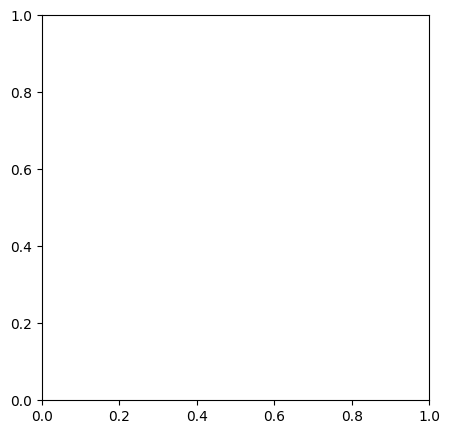

In [ ]:
x = np.arange(metricsEval.shape[1]-1)
width = 0.2
fsize = (10,10)

fig, ax = plt.subplots(1,1,figsize=fsize)
rects1 = ax.bar(x,metricsEval[metricsEval['nom']=='LDA'].iloc[:,1:].squeeze(),width,color='blue')
rects2 = ax.bar(x+ width,metricsEval[metricsEval['nom']=='RegLog'].iloc[:,1:].squeeze(),width,color='darkorange')
rects3 = ax.bar(x+ width+width,metricsEval[metricsEval['nom']=='RDForest'].iloc[:,1:].squeeze(),width,color='green')
ax.set_title('Résultats apprentissage', fontsize=20)
plt.xticks(x, ['Accuracy', 'Jaccard','Precision'], rotation='vertical')
ax.legend((rects1[0], rects2[0],rects3[0]), metricsEval['nom'])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk
import re
import string
import seaborn as sns
from wordcloud import WordCloud
import spacy
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()
test_doc='returning a value from within a nested javascript function duplicate '
df = pd.DataFrame({'question': [test_doc]})
df
def nettoyageGe(listToClean):
    
    # Lower case
    locList = listToClean.lower()

    # Remove ponctuation sauf #
    locList = re.sub('[^\\w\\s#]', '', locList)
    # Remove digit
    locList = re.sub(r'\w*\d+\w*', '', locList)
    # Remove links
    locList = re.sub(r'http*\S+', '', locList)
    # Remove \n
    locList = locList.replace("\n"," ")
    # Change some words
    locList = locList.replace("i'm","i am")
    locList = locList.replace("i've","i have")
    locList = locList.replace("i'd","i would")
    locList = locList.replace("don't","do not")
    locList = locList.replace("that's","that is")
    # On supprime les espaces en trop
    locList=" ".join(locList.split())
    locList = locList.replace("c #","c#")
    locList = locList.replace("c#","cSharp")
    
    return(locList)
def getWord(listToWork):
    """ 
    Fonction qui compte le nombre de mots différents
    listToWork : Dataframe
    """
    motList=[]
    tempData = df[listToWork].copy()
    
    for listData in tempData:
        for mot in listData:
            motList.append(mot)
            
    dfMotList = pd.DataFrame(motList, columns=["Mot"])
    dfMotList = dfMotList.groupby("Mot")\
        .agg(Count=pd.NamedAgg(column="Mot", aggfunc="count"))
    dfMotList.sort_values("Count", ascending=False, inplace=True)
    
    return dfMotList
# Supprimer les tag <code>
def SuppCode(x):
    soup = BeautifulSoup(x,"html.parser")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)
# Regrouper c et #
def RegCSharp(x):
    test = x.copy()
    while '#' in test : 
        idx = test.index('#')
        if(test[idx-1]=='c'):
            test[idx]="c#"
            del(test[idx-1])
        else:
            del(test[idx])
    return(test)
# Delete htlm et code tags
df['question'] = df['question'].apply(SuppCode)
# Delete all html tags
df['question'] = [BeautifulSoup(text,"html.parser").get_text() for text in df['question']]
nlp = spacy.load('en_core_web_sm')
pos_list = ["NOUN","PROPN"]
# On garde nom et prono
def keepNomEtPronom(info):
    doc = nlp(info)
    list_text_row = []
    for token in doc:
        if(token.pos_ in pos_list):
            list_text_row.append(token.text)
    list_text = " ".join(list_text_row)
    list_text = list_text.replace("c #", "c#")
    list_text_row = []
    return list_text
#Nettoyage général
df['question'] = df['question'].progress_apply(lambda x : nettoyageGe(x))
df['question'] = df['question'].progress_apply(lambda x : keepNomEtPronom(x))

# Tokenization
df['question'] = df['question'].apply(nltk.tokenize.word_tokenize)

df['question']=df['question'].apply(lambda x : RegCSharp(x))

# Lemmatizer
wn = nltk.WordNetLemmatizer()
df['question'] = df['question'].apply(lambda x : [wn.lemmatize(word) for word in x])

# StopWords
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))

df['question'] = df['question'].apply(lambda x : [mot for mot in x
                       if mot not in sw])
print(df['question'].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1/1 [00:00<00:00, 30.40it/s]

0    [value, javascript, function, duplicate]
Name: question, dtype: object


In [ ]:
X_tfidf = vectorizer.transform(df['question'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<1x476 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
predict = rfc_final_model.predict(X_tfidf)
# Inverse multilabel binarizer
tags_predict = multilabel_binarizer.inverse_transform(predict)
tags_predict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('javascript', 'jquery')]